ANALISIS EXPLORATORIO DE DATOS

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import ast

In [70]:
# Importar archivo para trabajar
archivo = "../PI 1/ETL/02 - Desanidado de datos y limpieza/Juegos_ETL.csv.gz"

# Lee el archivo CSV comprimido utilizando Pandas
Juegos = pd.read_csv(archivo, compression='gzip')
df = Juegos
df.head()

,Unnamed: 0,Id_juego,Nombre_juego,Genero,Año_Lanzamiento,Formato,Pago
0,0,761140,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",2018,['Single-player'],1
1,1,643980,Ironbound,"['Free to Play', 'Indie', 'RPG', 'Strategy']",2018,"['Single-player', 'Multi-player', 'Online Mult...",0
2,2,670290,Real Pool 3D - Poolians,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",2017,"['Single-player', 'Multi-player', 'Online Mult...",0
3,3,767400,弹炸人2222,"['Action', 'Adventure', 'Casual']",2017,['Single-player'],1
4,5,772540,Battle Royale Trainer,"['Action', 'Adventure', 'Simulation']",2018,"['Single-player', 'Steam Achievements']",1


In [73]:
df = df[["Id_juego", "Nombre_juego", "Genero", "Año_Lanzamiento", "Pago"]]
df.head()

,Id_juego,Nombre_juego,Genero,Año_Lanzamiento,Pago
0,761140,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",2018,1
1,643980,Ironbound,"['Free to Play', 'Indie', 'RPG', 'Strategy']",2018,0
2,670290,Real Pool 3D - Poolians,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",2017,0
3,767400,弹炸人2222,"['Action', 'Adventure', 'Casual']",2017,1
4,772540,Battle Royale Trainer,"['Action', 'Adventure', 'Simulation']",2018,1


DISTRIBUCION JUEGOS POR AÑO LANZAMIENTO

In [74]:
# Contar la cantidad de juegos por año
games_per_year = df['Año_Lanzamiento'].value_counts().sort_index()

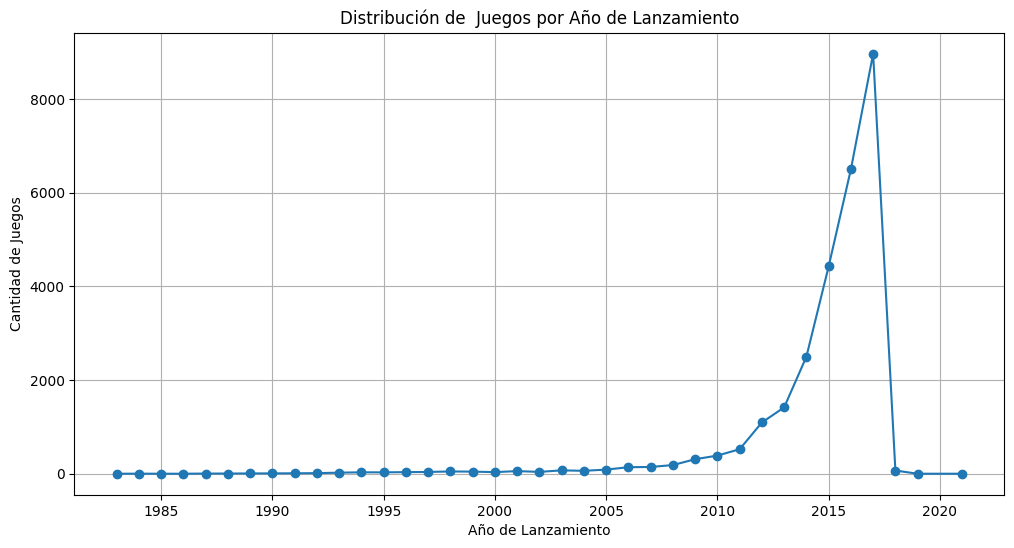

In [75]:
# Visualizar la distribución de juegos por año en un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de  Juegos por Año de Lanzamiento')
plt.grid(True)
plt.show()

In [76]:
df_año = pd.DataFrame({'Año': games_per_year.index, 'Cantidad': games_per_year.values})
df_año


,Año,Cantidad
0,1983,1
1,1984,2
2,1985,1
3,1986,1
4,1987,4
5,1988,5
6,1989,7
7,1990,8
8,1991,10
9,1992,13


Al parecer, según los datos suministrados, hay una caida abrupta de cantidad de juegos lanzados al mercado despues del año 2018, pero no es correcto; Solamente contamos con información de juegos hasta el año 2017.
Aquellos juegos en los que aparece los años 2018, 2019 y 2021, indica solamente que los mismos se encuentran en un etapa de desarrollo y dichas fechas son las indicadas para su lanzamiento al mercado.
Se marca una tendencia creciente que se visualiza grafica y numericamente, de la cantidad de juegos disponibles por año.

ANALISIS DE LA VARIABLE "GENERO" Y "PAGO", PARA LOS JUEGOS Y RELACIÓN

In [77]:
# Convertir las cadenas que representan listas a listas reales
df['Genero'] = df['Genero'].apply(ast.literal_eval)

C:\Users\atenc\AppData\Local\Temp\ipykernel_13528\3575703358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genero'] = df['Genero'].apply(ast.literal_eval)


In [78]:
# Aplicar one-hot encoding a las columnas 'Genero' 
df_expandido_genero = df['Genero'].apply(lambda x: pd.Series(1, x)).fillna(0)

# Eliminar las columnas originales 'Genero'
df = df.drop(['Id_juego', 'Genero', 'Nombre_juego', 'Año_Lanzamiento'], axis=1)

# Combina el DataFrame expandido con el original
df = pd.concat([df, df_expandido_genero], axis=1)
df

,Pago,Action,Casual,Indie,Simulation,Strategy,Free to Play,RPG,Sports,Adventure,...,Massively Multiplayer,Animation &amp; Modeling,Web Publishing,Education,Software Training,Utilities,Design &amp; Illustration,Audio Production,Video Production,Photo Editing
0,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27329,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27330,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27331,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27332,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Calcular la cantidad de unos para cada columna
conteos_unos = df.sum()

# Crear un nuevo DataFrame con los resultados
df_sum = pd.DataFrame({'Variable': conteos_unos.index, 'Cantidad': conteos_unos.values})
df_sum['Porcentaje'] = (df_sum['Cantidad'] / 27334) * 100
df_sum = df_sum.sort_values(by='Porcentaje', ascending=False)
df_sum


,Variable,Cantidad,Porcentaje
0,Pago,25812.0,94.431843
3,Indie,15129.0,55.348650
1,Action,10713.0,39.192947
2,Casual,8057.0,29.476110
9,Adventure,7814.0,28.587108
5,Strategy,6701.0,24.515256
4,Simulation,6514.0,23.831126
7,RPG,5130.0,18.767835
6,Free to Play,1886.0,6.899832
11,Early Access,1376.0,5.034024


VARIABLE "PAGO": 

El 95% de los juegos en cuestión son de modalidad "paga", indicandome que para el modelo de recomendación de ML no es una buena variable que ayude en el planteo (ya que claramente casi todos los juegos son pagos).

In [55]:
df_genero = df_sum[~(df_sum['Variable'] == "Pago")]
df_genero

,Variable,Cantidad,Porcentaje
3,Indie,15129.0,55.348650
1,Action,10713.0,39.192947
2,Casual,8057.0,29.476110
9,Adventure,7814.0,28.587108
5,Strategy,6701.0,24.515256
4,Simulation,6514.0,23.831126
7,RPG,5130.0,18.767835
6,Free to Play,1886.0,6.899832
11,Early Access,1376.0,5.034024
8,Sports,1207.0,4.415746


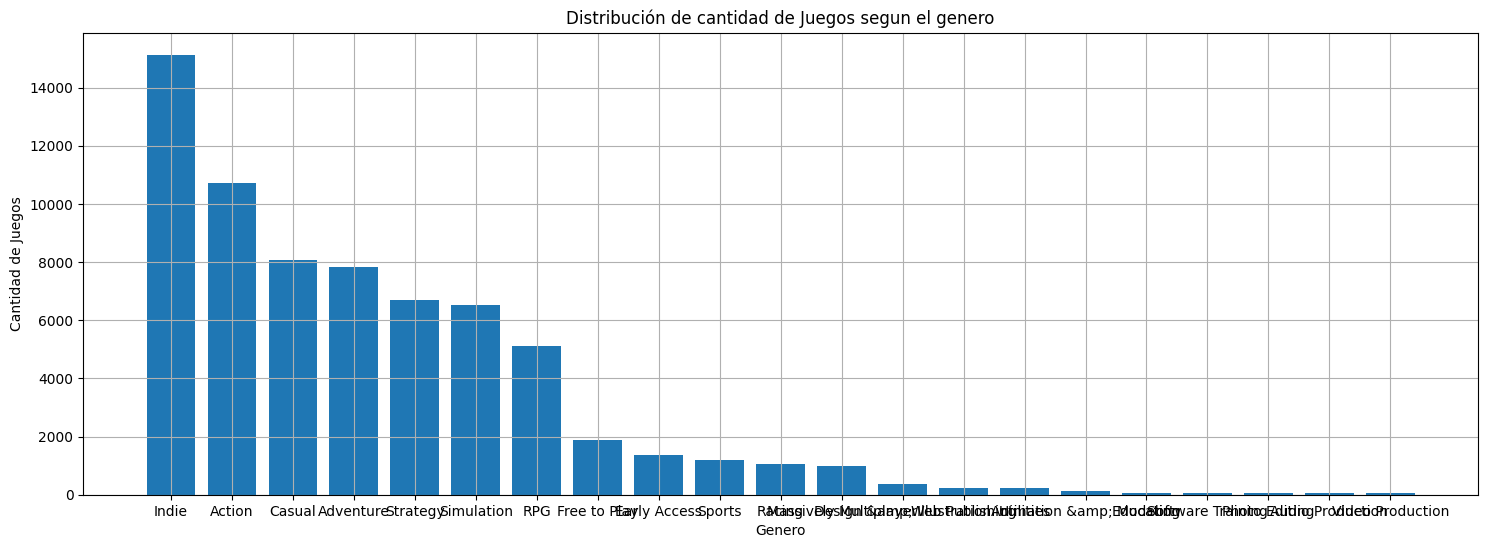

In [56]:
# Visualizar la distribución de juegos en un gráfico de barras
plt.figure(figsize=(18, 6))
plt.bar(df_genero.Variable, df_genero.Cantidad)
plt.xlabel('Genero')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de cantidad de Juegos segun el genero')
plt.xticks(df_genero.Variable)
plt.grid(True)
plt.show()

Puedo visualizar que los primeros 6 generos contienen la mayos cantidad de juegos, y como cada juego puede corresponder a varios generos, voy a proceder a analizar aquellos que contengan esos top 6

In [63]:
# Seleccionar las 6 columnas específicas
columnas_especificas = ['Indie', 'Action', 'Casual', 'Adventure', 'Strategy', 'Simulation']

# Contar las filas que contienen al menos un 1 en al menos 6 de estas columnas
conteo_filas = (df[columnas_especificas] == 1).sum(axis=1) >= 1


# Mostrar el conteo total de filas que cumplen con el criterio
print("La cantidad de juegos que correspondiente al menos a algunos de los 6 generos es:", conteo_filas.sum())
print("Y representan del total de juegos:", (conteo_filas.sum()/27334)*100, "%")

La cantidad de juegos que correspondiente al menos a algunos de los 6 generos es: 26024
Y representan del total de juegos: 95.20743396502525 %


VARIABLE "GENERO"

Del análisis realizado vimos que el 95% de los juegos corresponden a la categoria de al menos alguno de los siguientes generos : Indie, Action, Casual, Adventure, Strategy y Simulation.
Los juegos al estar correspondidos a varias categorias de generos, facilita su selección ante nueva busqueda de usuarios, asi tambien nos facilita a nosotros en el desarrollo del modelo de recomendación de ML a desarrollar en otro apartado.

GRAFICO DE CALOR

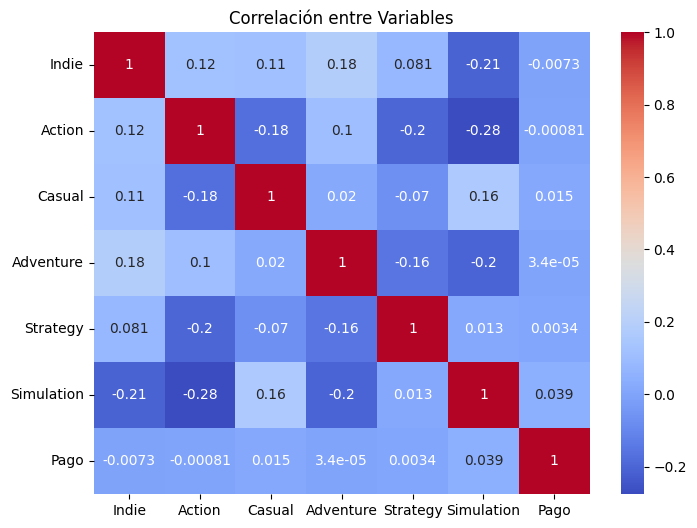

In [79]:
selected_vars = ['Indie', 'Action', 'Casual', 'Adventure', 'Strategy', 'Simulation', 'Pago']
selected_df = df[selected_vars]

# Calculo la matriz de correlación
correlation_matrix = selected_df.corr()

# Genero el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables')
plt.show()